# Visualise Data on a Geographical Map to Identify Regions of Interest

In [1]:

# import libraries
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#for the gif
import os
import glob
import PIL
from PIL import Image, ImageEnhance, ImageOps
import imageio

## open the Zarr file

In [2]:
#insert the path you have saved the cube or go to tutorial Seasfire_datacube_tutorial.ipynb to see how to access it
ds=xr.open_zarr(Path.home() / 'SeasFireCube8daily.zarr')

In [3]:
ds

<xarray.Dataset>
Dimensions:             (time: 966, latitude: 720, longitude: 1440)
Coordinates:
  * latitude            (latitude) float64 89.88 89.62 89.38 ... -89.62 -89.88
  * longitude           (longitude) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
Data variables: (12/38)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>

## We are making a gif in a loop with the total burned area (GWIS_BAs variable) for each year

## Similarly you can do the same for each variable you want

In [4]:
## in SeasFire Datacube v2.0 the burned area variables would have the water bodies masked with ERA-5 land sea mask 
# for now use as mask the 'BurntArea' where it has already nan in the oceans
mask= ds['BurntArea'][0,:,:]

In [5]:
mask

<xarray.DataArray 'BurntArea' (latitude: 720, longitude: 1440)>
dask.array<getitem, shape=(720, 1440), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    time       datetime64[ns] 2001-01-01T12:00:00

In [5]:
gwis=ds['BAs_GWIS']

In [6]:
#resample to get yearly data 
gwis_all=gwis.resample(time="1Y").sum()

In [8]:
gwis_all=gwis_all.load()

In [9]:
gwis_all

<xarray.DataArray 'BAs_GWIS' (time: 21, latitude: 720, longitude: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2001-12-31 2002-12-31 ... 2021-12-31
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9

In [13]:
masked_data=gwis_all.where(mask>-9999)

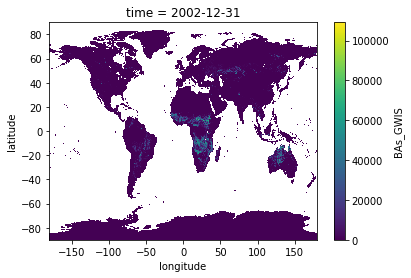

In [15]:
#check how it looks
masked_data[1,:,:].plot()

## save the figures 

/tmp/ipykernel_413958/147045626.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('BAs_year_'+str(i+2001), bbox_inches='tight', dpi=200, quality=95)


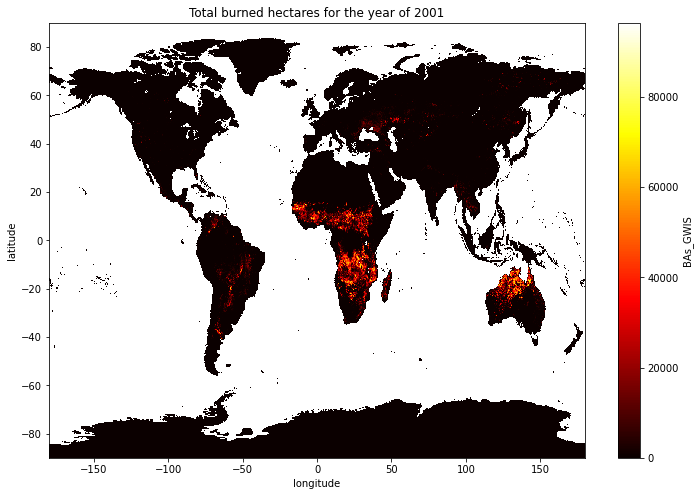

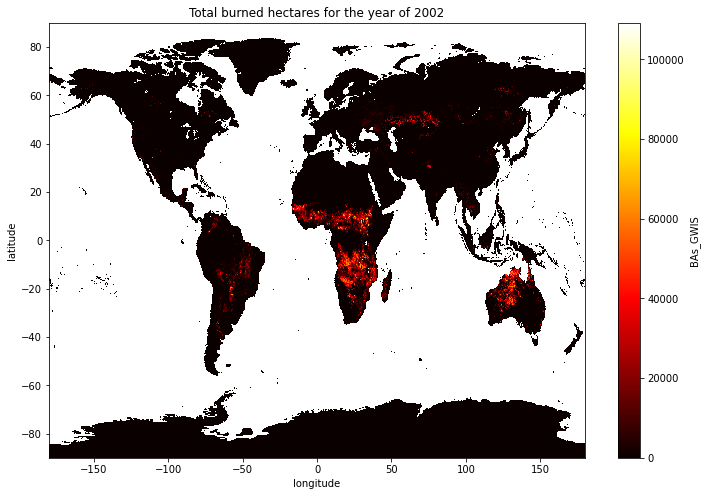

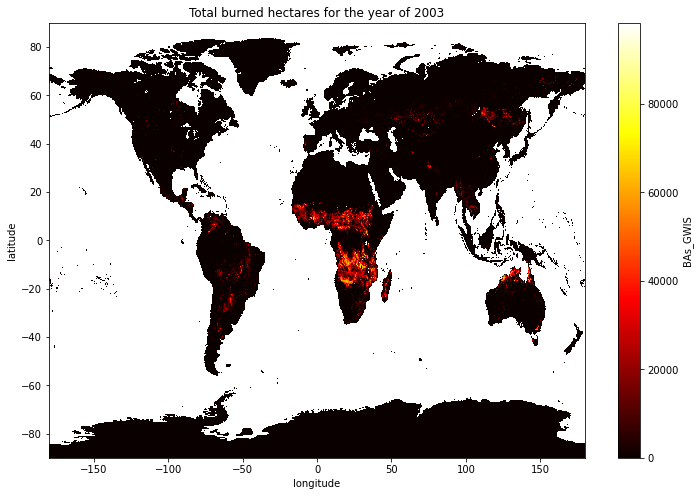

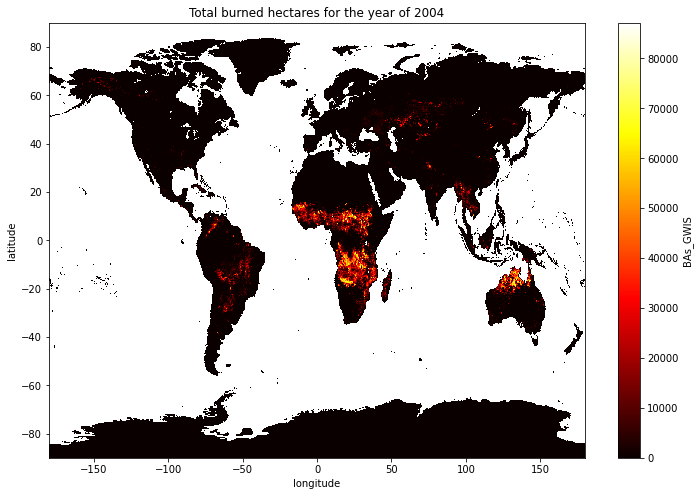

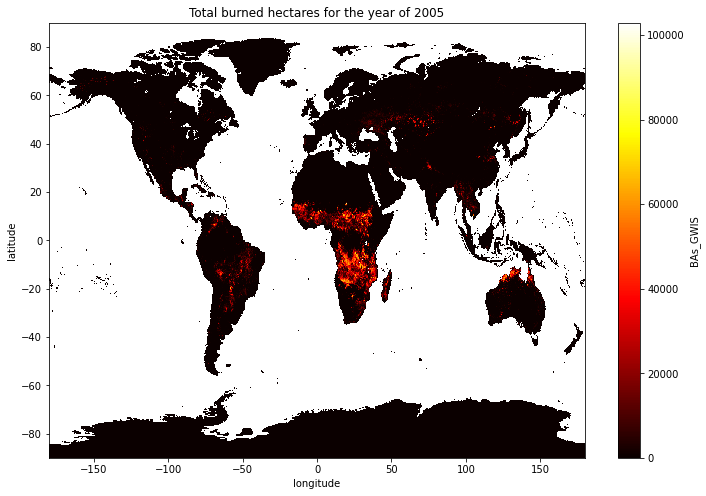

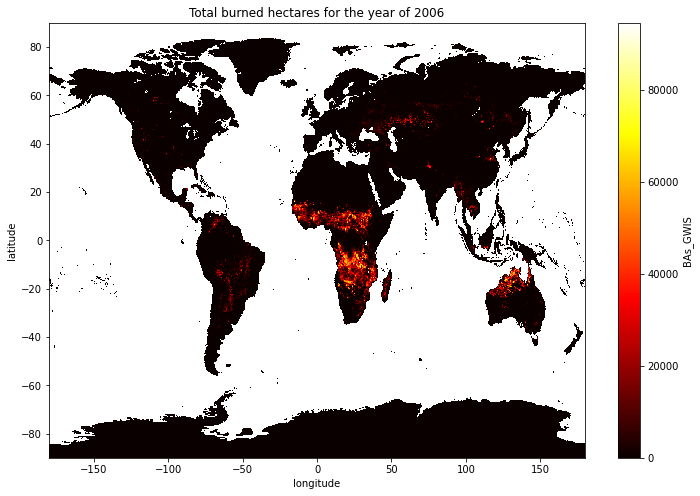

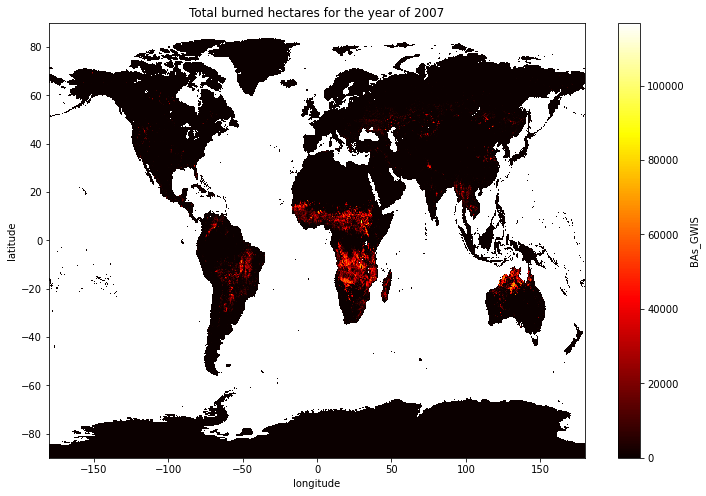

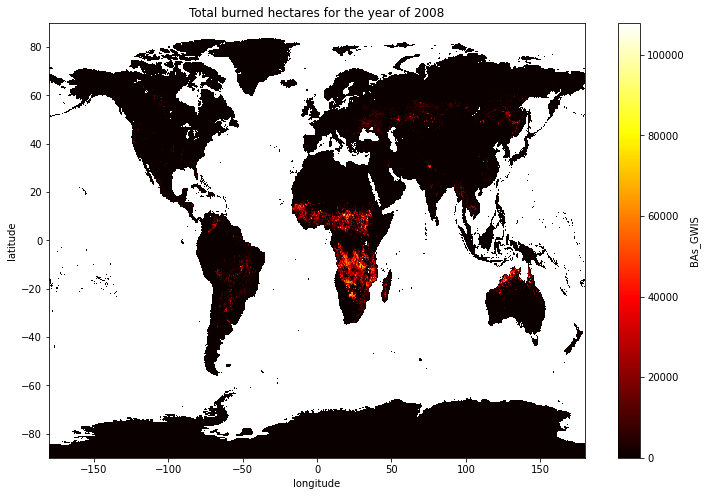

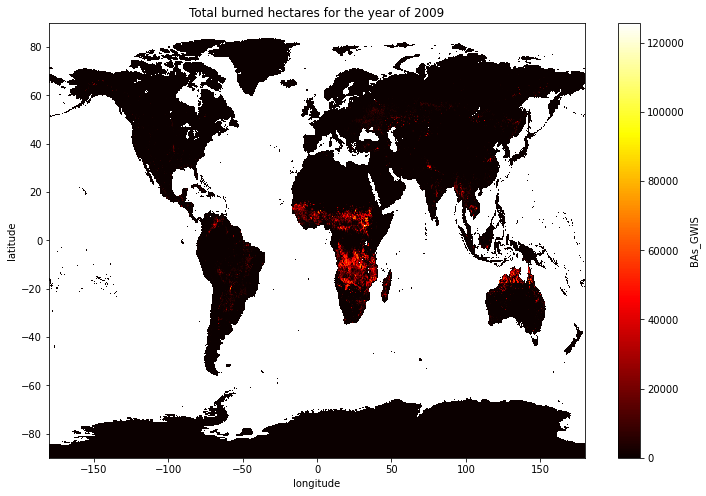

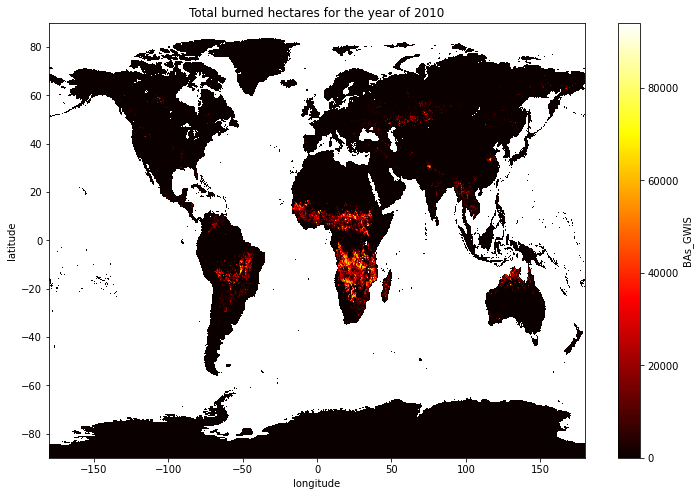

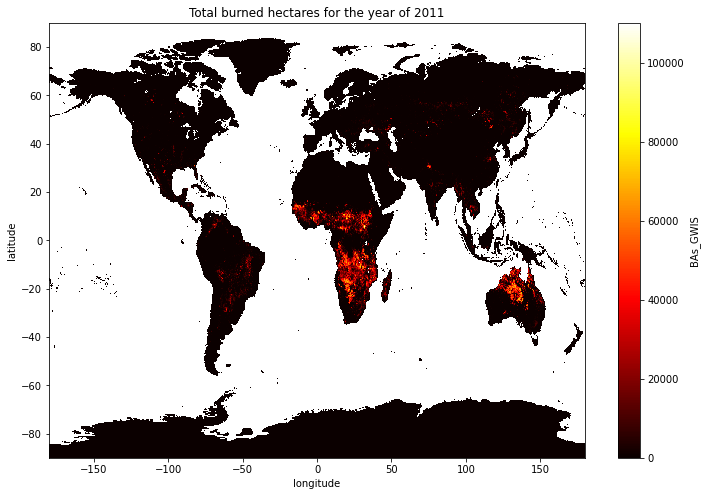

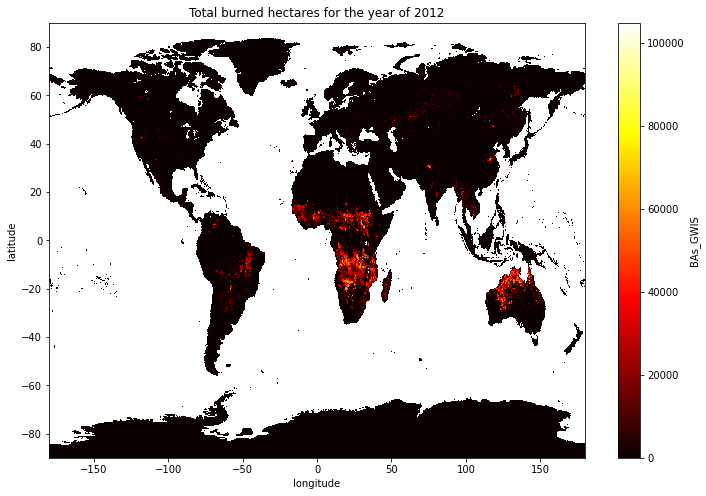

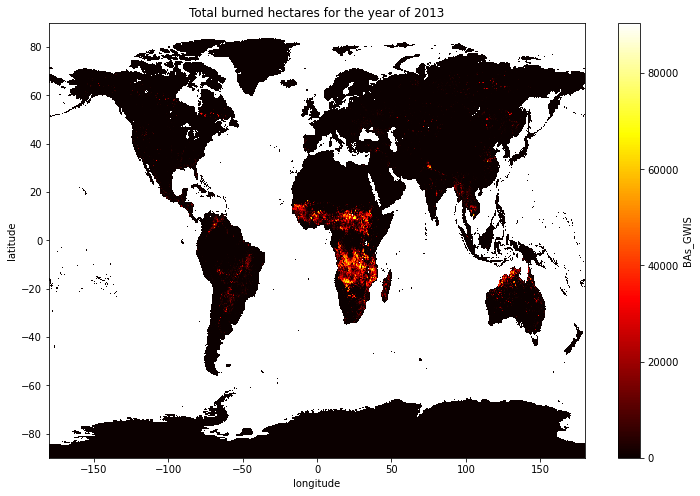

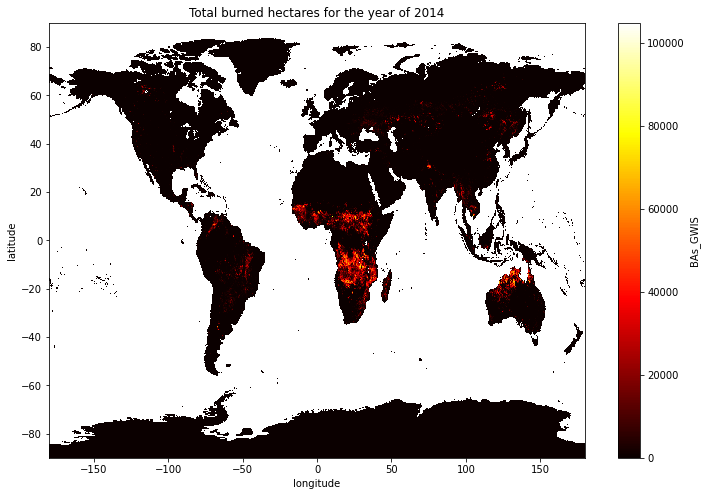

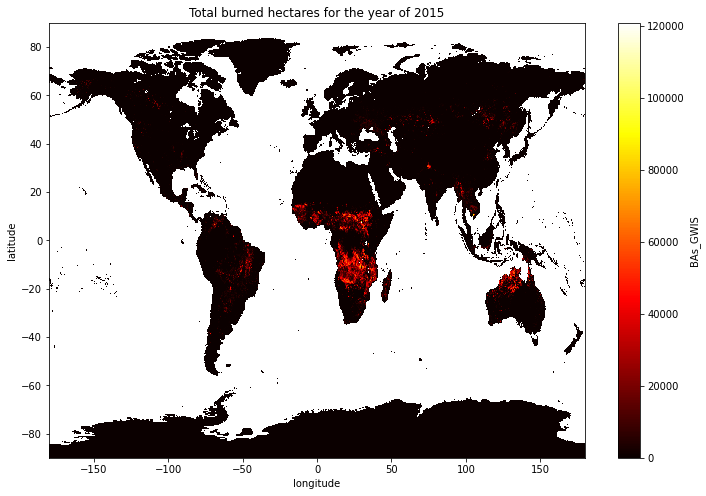

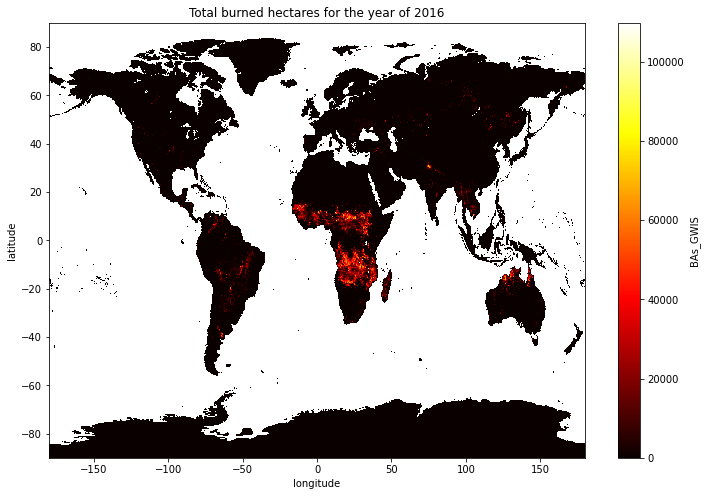

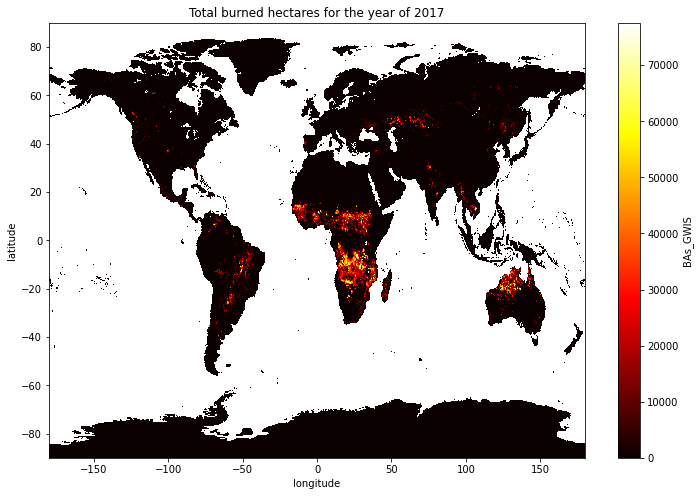

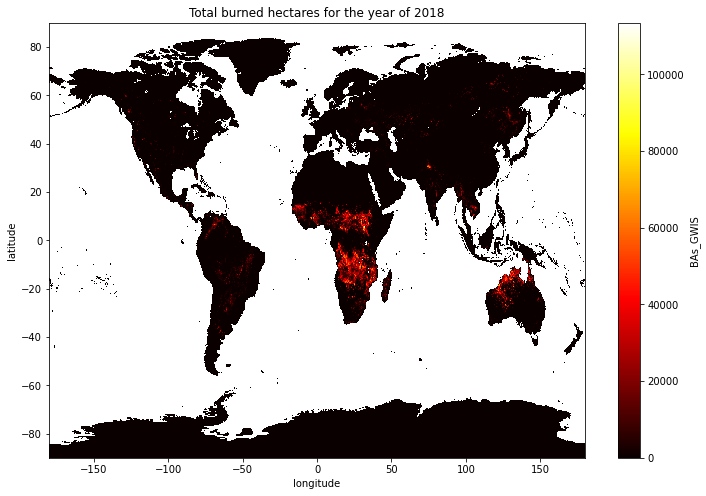

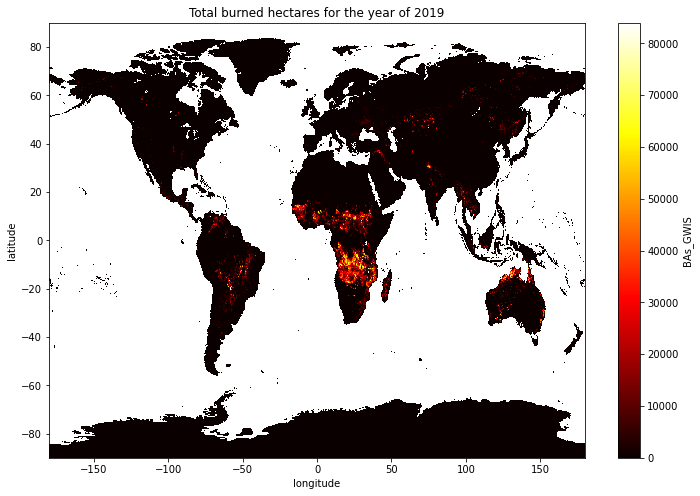

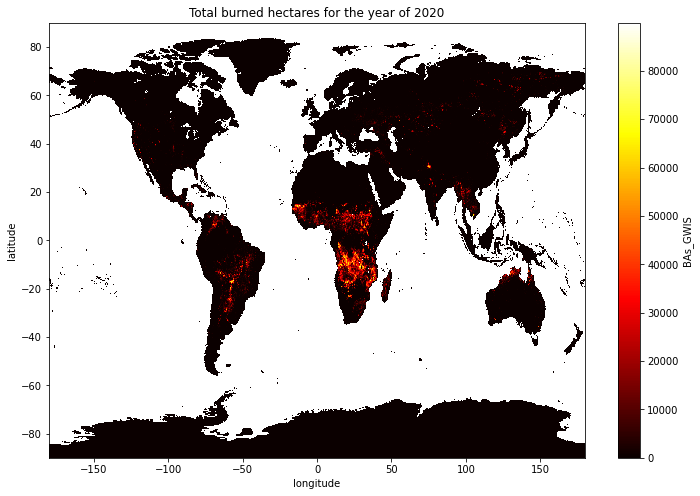

In [16]:
for i in range (20):
    figure(figsize=(12, 8))
    #cmap is for the colorbar 
    masked_data[i,:,:].plot(cmap='hot') #cmap="OrRd"
    plt.title('Total burned hectares for the year of '+str(i+2001))
    #plt.tight_layout()
    #this would save your images
    #you can also make the colorbar stable (not applied in this visualization)
    #you can increase the dpi for better resolution 
    plt.savefig('BAs_year_'+str(i+2001), bbox_inches='tight', dpi=200, quality=95)
    plt.show()

## now lets make a GIF

In [17]:

#sort the pngs
files = sorted(glob.glob("BAs*.png"))


In [18]:
#make sure you have the files in the correct order
files

['BAs_year_2001.png',
 'BAs_year_2002.png',
 'BAs_year_2003.png',
 'BAs_year_2004.png',
 'BAs_year_2005.png',
 'BAs_year_2006.png',
 'BAs_year_2007.png',
 'BAs_year_2008.png',
 'BAs_year_2009.png',
 'BAs_year_2010.png',
 'BAs_year_2011.png',
 'BAs_year_2012.png',
 'BAs_year_2013.png',
 'BAs_year_2014.png',
 'BAs_year_2015.png',
 'BAs_year_2016.png',
 'BAs_year_2017.png',
 'BAs_year_2018.png',
 'BAs_year_2019.png',
 'BAs_year_2020.png']

In [ ]:
#if the previous doen't sort them correctly choose the following code
#You ll need the following code one of you don't have the appropiate title in your pngs 
#Sort the files by order of creation
# files = glob.glob("BAs*.png")
# files.sort(key=os.path.getmtime)

In [19]:
#make sure all images have the same shape and size
for i in files:
    im = Image. open(i)
    print(im. info['dpi'])
    print(im)

(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1945x1377 at 0x7FA2B77C5490>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C4179640>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1945x1377 at 0x7FA2C6762D00>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1945x1377 at 0x7FA2C77F0220>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C6762D00>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1945x1377 at 0x7FA2C77F02E0>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C6762D00>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C77F0220>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C6762D00>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode

In [20]:
#probably it would not be the same so you have to resize, make background white and save 
for i in files:
    im = Image. open(i)
    #print(im)
    #this is a size I choose you can choose a different one as well
    img_resized = im.resize((2179,1579)) 
    im = ImageOps.expand(img_resized)
    #make background white so that the titles will appear 
    fill_color=(255,255,255,255)
    background = Image.new(im.mode[:-1], im.size, fill_color)
    background.paste(im, im.split()[-1]) # omit transparency
    im = background
    #you can increase the dpi as well(300 is a very good one)
    new_img = im.save('final_'+i, dpi=(100,100))

In [21]:
#sort again 
files = sorted(glob.glob("final*.png"))

In [22]:
files

['final_BAs_year_2001.png',
 'final_BAs_year_2002.png',
 'final_BAs_year_2003.png',
 'final_BAs_year_2004.png',
 'final_BAs_year_2005.png',
 'final_BAs_year_2006.png',
 'final_BAs_year_2007.png',
 'final_BAs_year_2008.png',
 'final_BAs_year_2009.png',
 'final_BAs_year_2010.png',
 'final_BAs_year_2011.png',
 'final_BAs_year_2012.png',
 'final_BAs_year_2013.png',
 'final_BAs_year_2014.png',
 'final_BAs_year_2015.png',
 'final_BAs_year_2016.png',
 'final_BAs_year_2017.png',
 'final_BAs_year_2018.png',
 'final_BAs_year_2019.png',
 'final_BAs_year_2020.png']

In [23]:
#play with fps to make it slower or faster
images = []
for i in files:
    images.append(imageio.imread(i))
imageio.mimsave('BAs_GWIS_gif_fps09.gif', images,format='GIF', fps=0.9)

/tmp/ipykernel_413958/2412458861.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(i))


In [ ]:
## in SeasFire Datacube v2.0 the burned area variables would have the water bodies masked with ERA-5 land sea mask 